In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
input_data = pd.read_csv('netflix1.csv', parse_dates=['date_added'])

In [3]:
input_data.loc[4]

show_id                                                       s8
type                                                       Movie
title                                                    Sankofa
director                                            Haile Gerima
country                                            United States
date_added                                   2021-09-24 00:00:00
release_year                                                1993
rating                                                     TV-MA
duration                                                 125 min
listed_in       Dramas, Independent Movies, International Movies
Name: 4, dtype: object

In [4]:
input_data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
input_data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,2018-06-07,2016,TV-Y7,1 Season,Kids' TV


In [6]:
def has_duplicates(data):
    for _ in data.columns:
        if len(data[_]) == len(set(data[_])):
            print(f'{_} column has NO duplicates.')
        else:
            print(f'{_} column has duplicates.')

In [7]:
has_duplicates(input_data)

show_id column has NO duplicates.
type column has duplicates.
title column has duplicates.
director column has duplicates.
country column has duplicates.
date_added column has duplicates.
release_year column has duplicates.
rating column has duplicates.
duration column has duplicates.
listed_in column has duplicates.


In [8]:
input_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
tmp_input_data = input_data.copy()

In [10]:
tmp_input_data['date_added_year'] = input_data['date_added'].dt.year
tmp_input_data['date_added_month'] = input_data['date_added'].dt.month
tmp_input_data['date_added_day'] =  input_data['date_added'].dt.day
tmp_input_data.drop('date_added',axis=1, inplace=True)

In [11]:
duration_list = tmp_input_data['duration'].unique()

In [12]:
tmp_input_data.head().T

,0,1,2,3,4
show_id,s1,s3,s6,s14,s8
type,Movie,TV Show,TV Show,Movie,Movie
title,Dick Johnson Is Dead,Ganglands,Midnight Mass,Confessions of an Invisible Girl,Sankofa
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan,Bruno Garotti,Haile Gerima
country,United States,France,United States,Brazil,United States
release_year,2020,2021,2021,2021,1993
rating,PG-13,TV-MA,TV-MA,TV-PG,TV-MA
duration,90 min,1 Season,1 Season,91 min,125 min
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries","Children & Family Movies, Comedies","Dramas, Independent Movies, International Movies"
date_added_year,2021,2021,2021,2021,2021


In [13]:
len(input_data['director'].unique())

4528

In [14]:
movie_pattern = re.compile(r'')

In [15]:
def extract_number(text):
    match = re.search(r'\d+', str(text))
    return match.group() if match else None

In [16]:
tmp_input_data['duration'] = tmp_input_data['duration'].apply(extract_number)

In [17]:
tmp_input_data.head(2)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,date_added_year,date_added_month,date_added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24


In [18]:
def extract_duration(data):
    match = re.search(r'\d+', data['duration'])
    duration = int(match.group()) if match else 0
    if data['type'] == 'Movie':
        return pd.Series([duration, 0], index=['movie_duration', 'series_duration']) 
    else:
        return pd.Series([0, duration], index=['movie_duration', 'series_duration'])

In [19]:
tmp_input_data[['movie_duration','series_duration']] = tmp_input_data.apply(extract_duration, axis=1)
tmp_input_data.drop('duration', axis=1)

,show_id,type,title,director,country,release_year,rating,listed_in,date_added_year,date_added_month,date_added_day,movie_duration,series_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,2021,9,25,90,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,0,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,0,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,"Children & Family Movies, Comedies",2021,9,22,91,0
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,9,24,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,"International TV Shows, TV Dramas",2017,1,17,0,2
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,Kids' TV,2018,9,13,0,3
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,0,1
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,Kids' TV,2018,6,23,0,1


In [20]:
tmp_input_data.drop('duration', axis=1, inplace=True)

In [21]:
tmp_input_data.head()

,show_id,type,title,director,country,release_year,rating,listed_in,date_added_year,date_added_month,date_added_day,movie_duration,series_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,2021,9,25,90,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,0,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,0,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,"Children & Family Movies, Comedies",2021,9,22,91,0
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,9,24,125,0


In [22]:
tmp_input_data.rename(columns={'movie_duration':'movie_duration(mins)', 'series_duration':'series_duration(seasons)'}, inplace=True)

In [23]:
tmp_input_data.head().T

,0,1,2,3,4
show_id,s1,s3,s6,s14,s8
type,Movie,TV Show,TV Show,Movie,Movie
title,Dick Johnson Is Dead,Ganglands,Midnight Mass,Confessions of an Invisible Girl,Sankofa
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan,Bruno Garotti,Haile Gerima
country,United States,France,United States,Brazil,United States
release_year,2020,2021,2021,2021,1993
rating,PG-13,TV-MA,TV-MA,TV-PG,TV-MA
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries","Children & Family Movies, Comedies","Dramas, Independent Movies, International Movies"
date_added_year,2021,2021,2021,2021,2021
date_added_month,9,9,9,9,9


In [24]:
genre = list(tmp_input_data.listed_in.unique())

In [25]:
genre

['Documentaries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'TV Dramas, TV Horror, TV Mysteries',
 'Children & Family Movies, Comedies',
 'Dramas, Independent Movies, International Movies',
 'British TV Shows, Reality TV',
 'Comedies, Dramas',
 'Children & Family Movies, Comedies, Music & Musicals',
 'Dramas, International Movies',
 'Children & Family Movies, Music & Musicals',
 'Dramas, International Movies, Music & Musicals',
 'Movies',
 'Comedies',
 'Docuseries, Reality TV',
 'British TV Shows, Crime TV Shows, Docuseries',
 'Children & Family Movies',
 "Kids' TV",
 'Documentaries, International Movies',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Comedies, International Movies, Romantic Movies',
 'Horror Movies, Sci-Fi & Fantasy',
 'Thrillers',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'TV Comedies',
 'International TV Shows, TV Dramas, TV Thrillers',
 'Reality TV',
 "Anime Series, Kids' TV",
 "Kids' TV, Korea

In [73]:
spl_genre = list(set(genre.strip() for item in genre for genre in item.split(',')))

In [74]:
len(spl_genre)

42

In [69]:
spl_genre = list(spl_genre)

In [75]:
def genre_categorizer(data_for_categorization):
    for _ in spl_genre:
       data_for_categorization[_] = 1 if _ in input_data['listed_in'] else 0

In [88]:
import pandas as pd

def genre_categorizer(input_data, spl_genre):
    tmp_input_data = {}  # Initialize the dictionary
    
    # Ensure 'listed_in' is extracted properly as a string
    listed_in = input_data.get('listed_in', "")
    
    # If it's a pandas Series, take the first value (assuming it's a single row)
    if isinstance(listed_in, pd.Series):
        listed_in = listed_in.iloc[0]  # Extract the actual string from the Series
    
    # Convert to a set for faster lookup
    listed_in = set(str(listed_in).split(','))  # Ensure it's a string before splitting
    
    for genre in spl_genre:
        tmp_input_data[genre] = 1 if genre in listed_in else 0
    
    return tmp_input_data


In [89]:
genre_categorizer(tmp_input_data, spl_genre)

{'TV Comedies': 0,
 'Stand-Up Comedy': 0,
 'LGBTQ Movies': 0,
 'Comedies': 0,
 'Classic & Cult TV': 0,
 'Docuseries': 0,
 'Thrillers': 0,
 'Anime Series': 0,
 'Anime Features': 0,
 'TV Thrillers': 0,
 'Romantic Movies': 0,
 'Documentaries': 1,
 'Spanish-Language TV Shows': 0,
 'Sci-Fi & Fantasy': 0,
 'Action & Adventure': 0,
 'TV Action & Adventure': 0,
 'Science & Nature TV': 0,
 'Music & Musicals': 0,
 'Stand-Up Comedy & Talk Shows': 0,
 'Sports Movies': 0,
 'Cult Movies': 0,
 'British TV Shows': 0,
 'TV Shows': 0,
 'Faith & Spirituality': 0,
 "Kids' TV": 0,
 'TV Mysteries': 0,
 'Reality TV': 0,
 'Korean TV Shows': 0,
 'Children & Family Movies': 0,
 'TV Dramas': 0,
 'Classic Movies': 0,
 'Dramas': 0,
 'Crime TV Shows': 0,
 'Horror Movies': 0,
 'International TV Shows': 0,
 'TV Horror': 0,
 'Romantic TV Shows': 0,
 'Teen TV Shows': 0,
 'Movies': 0,
 'TV Sci-Fi & Fantasy': 0,
 'International Movies': 0,
 'Independent Movies': 0}

In [92]:
tmp_input_data[tmp_input_data['Horror Movies'] == 1]

,show_id,type,title,director,country,release_year,rating,listed_in,date_added_year,date_added_month,...,Crime TV Shows,Horror Movies,International TV Shows,TV Horror,Romantic TV Shows,Teen TV Shows,Movies,TV Sci-Fi & Fantasy,International Movies,Independent Movies


In [80]:
input_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [85]:
tmp_input_data.drop(['show_id', 'type', 'title', 'director', 'country',
       'release_year', 'rating', 'listed_in'], axis=1).sum()

date_added_year                 17745899
date_added_month                   58505
date_added_day                    109875
movie_duration(mins)              610057
series_duration(seasons)            4667
TV Comedies                            0
Stand-Up Comedy                        0
LGBTQ Movies                           0
Comedies                               0
Classic & Cult TV                      0
Docuseries                             0
Thrillers                              0
Anime Series                           0
Anime Features                         0
TV Thrillers                           0
Romantic Movies                        0
Documentaries                          0
Spanish-Language TV Shows              0
Sci-Fi & Fantasy                       0
Action & Adventure                     0
TV Action & Adventure                  0
Science & Nature TV                    0
Music & Musicals                       0
Stand-Up Comedy & Talk Shows           0
Sports Movies   

In [ ]:
tmp_input_data['']

In [42]:
input_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

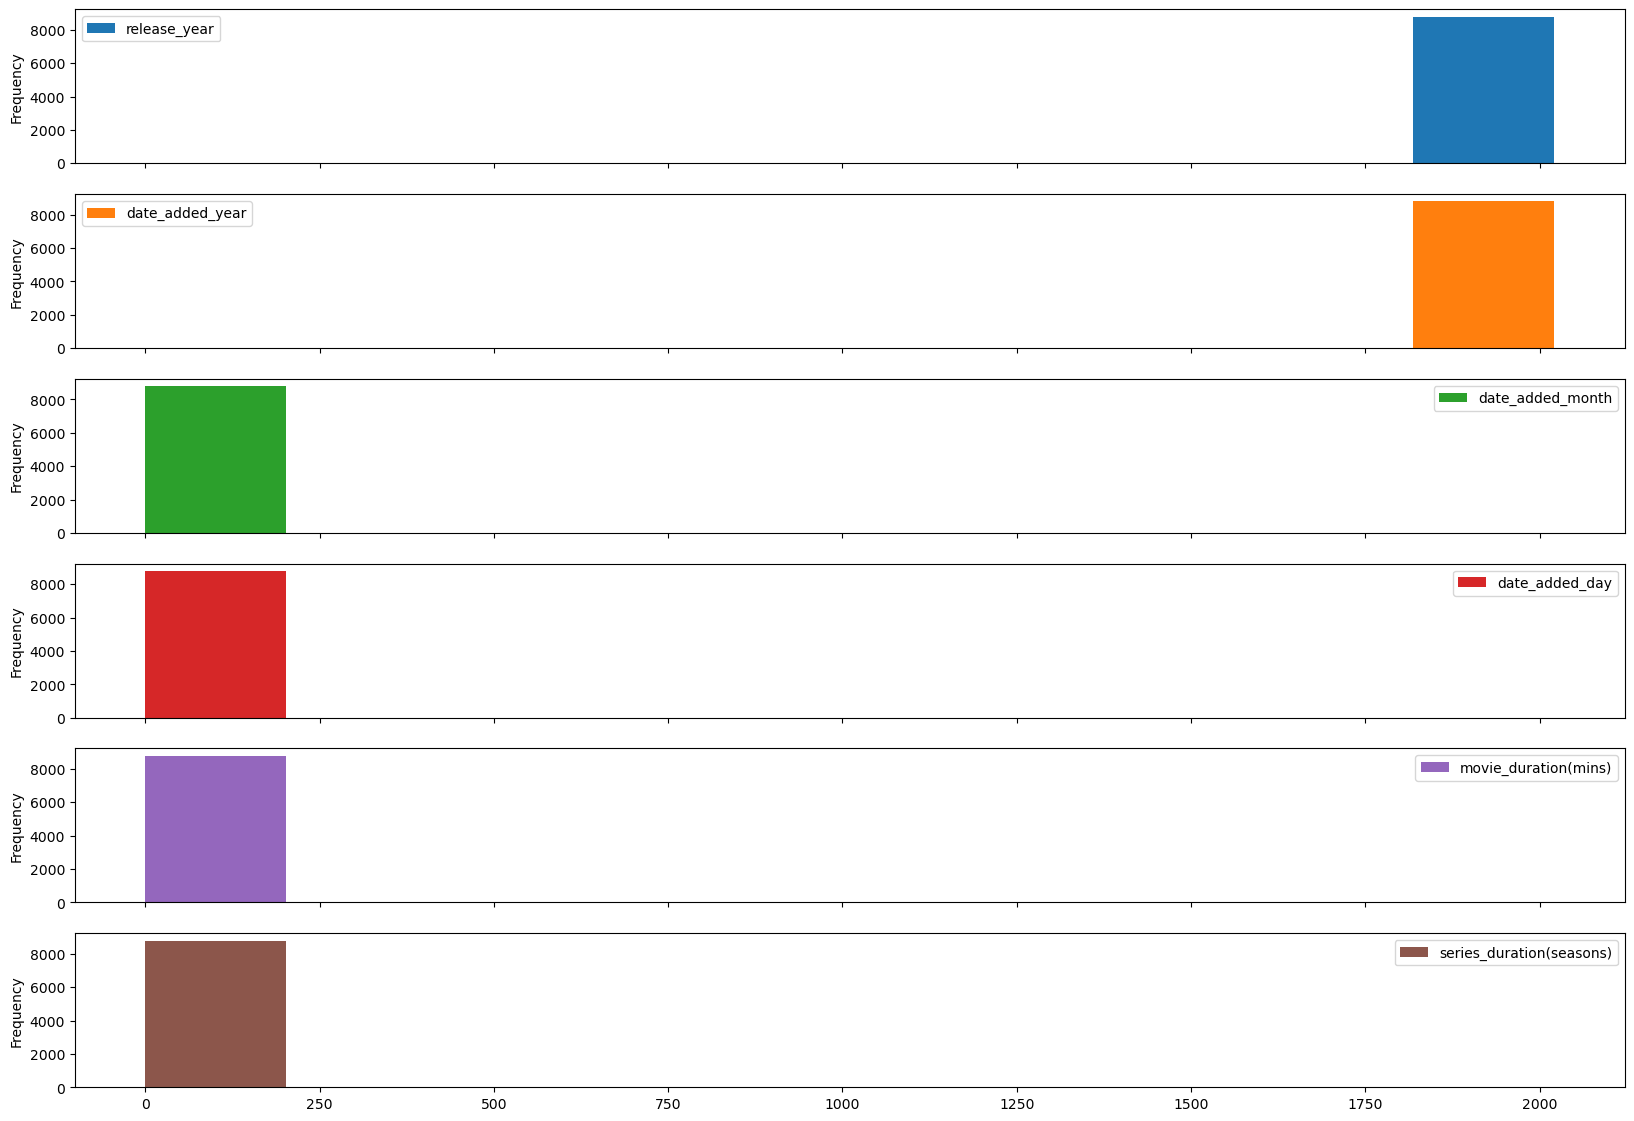

In [62]:
tmp_input_data.plot.hist(figsize=(20,14),
                         subplots=True)

In [63]:
tmp_input_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'release_year',
       'rating', 'listed_in', 'date_added_year', 'date_added_month',
       'date_added_day', 'movie_duration(mins)', 'series_duration(seasons)'],
      dtype='object')

In [ ]:
tmp_input_data.listed_in.unique)

<BarContainer object of 8790 artists>

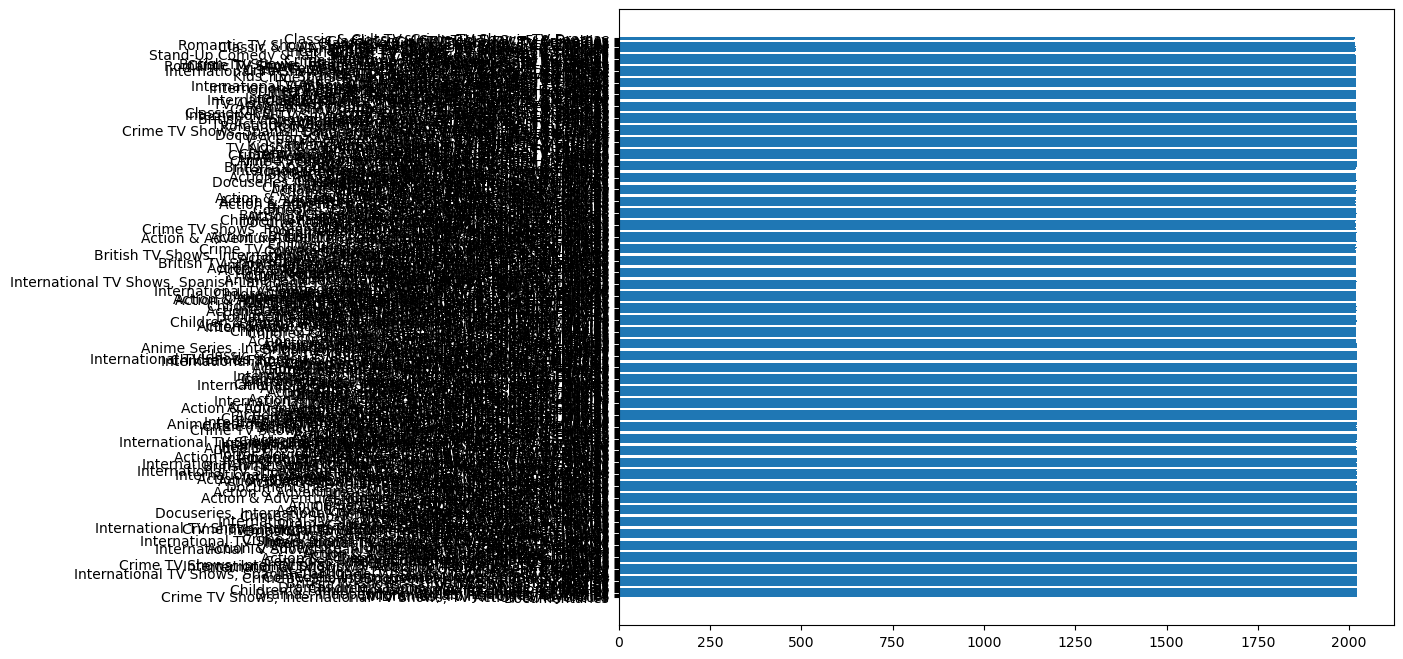

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(tmp_input_data.listed_in, tmp_input_data.date_added_year)

<BarContainer object of 8790 artists>

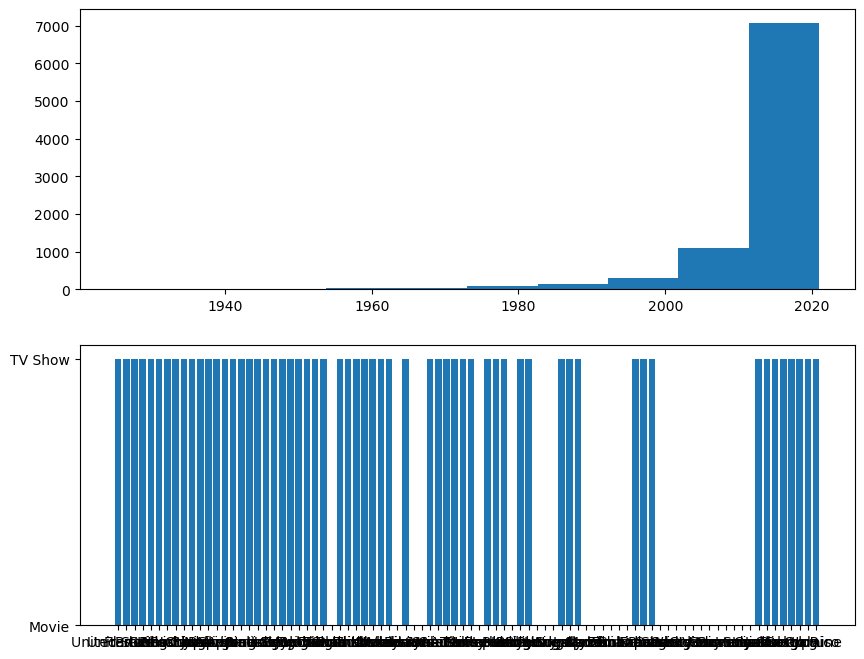

In [44]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(10,8))
ax0.hist(tmp_input_data['release_year'])
ax1.bar(tmp_input_data['country'], tmp_input_data['type'])

In [258]:
type(spl_genre)

list

In [259]:
tmp_input_data[spl_genre] = tmp_input_data['listed_in'].apply(extract_genre)

TypeError: decoding to str: need a bytes-like object, set found

In [ ]:
fig, ax = plt.s